In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')  # or 'seaborn-v0_8' if available
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the Excel file
df = pd.read_excel('/home/alaskapycoder/DataScience/Daily_Inventory_Dashboard.xlsx', sheet_name='Sheet1')

print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

Data loaded: 1700 rows, 21 columns

Columns: ['ProductNumber', 'Description', 'Planner', 'Active_Demand', 'TotalOnHand', 'Safety_Stock', 'Stock_Buffer', 'ProductionReq', 'PlannedReq', 'OnOrder', 'Below_Reorder', 'High_Value_Flag', 'Stock_vs_Demand', 'Stock_Status', 'Priority_Rank', 'Planner_Priority_Rank', 'ACTION_REQUIRED', 'BUFFER_PERCENTAGE', 'STOCK_HEALTH', 'STOCK_ZONE', 'DAYS_COVERAGE']

Data types:
ProductNumber             object
Description               object
Planner                   object
Active_Demand            float64
TotalOnHand              float64
Safety_Stock               int64
Stock_Buffer             float64
ProductionReq            float64
PlannedReq               float64
OnOrder                  float64
Below_Reorder             object
High_Value_Flag           object
Stock_vs_Demand          float64
Stock_Status              object
Priority_Rank              int64
Planner_Priority_Rank      int64
ACTION_REQUIRED           object
BUFFER_PERCENTAGE         objec

In [6]:
# Display basic information
print("=== DATA OVERVIEW ===")
df.info()

# First few rows
print("\n=== FIRST 5 ROWS ===")
df.head()

# Last few rows
print("\n=== LAST 5 ROWS ===")
df.tail()

=== DATA OVERVIEW ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductNumber          1700 non-null   object 
 1   Description            1700 non-null   object 
 2   Planner                1700 non-null   object 
 3   Active_Demand          1700 non-null   float64
 4   TotalOnHand            1700 non-null   float64
 5   Safety_Stock           1700 non-null   int64  
 6   Stock_Buffer           1700 non-null   float64
 7   ProductionReq          1700 non-null   float64
 8   PlannedReq             1700 non-null   float64
 9   OnOrder                1700 non-null   float64
 10  Below_Reorder          1700 non-null   object 
 11  High_Value_Flag        1700 non-null   object 
 12  Stock_vs_Demand        1700 non-null   float64
 13  Stock_Status           1700 non-null   object 
 14  Priority_Rank          1700 non-nu

,ProductNumber,Description,Planner,Active_Demand,TotalOnHand,Safety_Stock,Stock_Buffer,ProductionReq,PlannedReq,OnOrder,...,High_Value_Flag,Stock_vs_Demand,Stock_Status,Priority_Rank,Planner_Priority_Rank,ACTION_REQUIRED,BUFFER_PERCENTAGE,STOCK_HEALTH,STOCK_ZONE,DAYS_COVERAGE
1695,WS16X8VCPWB115,WINDSTKR VC WB115 UP TO 16 2,HDW01,20.0,540.0,100,440.0,20.0,0.0,0.0,...,LOW PRIORITY,520.0,SUFFICIENT,830,84,NORMAL,440%,HEALTHY STOCK,BLUE ZONE,MODERATE - <1 MONTH BUFFER
1696,WS18X82FVWB115,WINDSTKR 2FV WB115 UP TO 18 2,HDW01,1.0,627.0,100,527.0,0.0,1.0,0.0,...,LOW PRIORITY,626.0,SUFFICIENT,1558,83,NORMAL,527%,HEALTHY STOCK,BLUE ZONE,NO PRODUCTION DATA
1697,WS18X8RTGWB115,WINDSTKR RTG WB115 UP TO 18 2,HDW01,1.0,345.0,100,245.0,0.0,1.0,0.0,...,LOW PRIORITY,344.0,SUFFICIENT,1558,95,NORMAL,245%,HEALTHY STOCK,BLUE ZONE,NO PRODUCTION DATA
1698,WS18X8S24WB115,WINDSTKR S24 WB115 UP TO 18 2,HDW01,1.0,489.0,100,389.0,0.0,1.0,0.0,...,LOW PRIORITY,488.0,SUFFICIENT,1558,86,NORMAL,389%,HEALTHY STOCK,BLUE ZONE,NO PRODUCTION DATA
1699,WS18X8TSWB115,WINDSTKR TS WB115 UP TO 18 2,HDW01,15.0,800.0,200,600.0,15.0,0.0,0.0,...,LOW PRIORITY,785.0,SUFFICIENT,901,78,NORMAL,300%,HEALTHY STOCK,BLUE ZONE,HEALTHY STOCK


In [7]:
# Missing values analysis
print("=== MISSING DATA ANALYSIS ===")
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

# Duplicate analysis
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

=== MISSING DATA ANALYSIS ===
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Duplicate rows: 0


In [8]:
# Statistical summary for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {list(numeric_cols)}")

if len(numeric_cols) > 0:
    print("\n=== STATISTICAL SUMMARY ===")
    df[numeric_cols].describe()

Numeric columns: ['Active_Demand', 'TotalOnHand', 'Safety_Stock', 'Stock_Buffer', 'ProductionReq', 'PlannedReq', 'OnOrder', 'Stock_vs_Demand', 'Priority_Rank', 'Planner_Priority_Rank']

=== STATISTICAL SUMMARY ===


In [9]:
# Try to identify common inventory columns
print("=== COLUMN IDENTIFICATION ===")

potential_cols = {
    'product': [col for col in df.columns if any(x in col.lower() for x in ['product', 'item', 'sku', 'name'])],
    'quantity': [col for col in df.columns if any(x in col.lower() for x in ['quantity', 'qty', 'stock', 'inventory'])],
    'price': [col for col in df.columns if any(x in col.lower() for x in ['price', 'cost', 'value', 'amount'])],
    'date': [col for col in df.columns if any(x in col.lower() for x in ['date', 'time', 'day'])],
    'category': [col for col in df.columns if any(x in col.lower() for x in ['category', 'type', 'class', 'group'])]
}

for key, cols in potential_cols.items():
    if cols:
        print(f"{key.title()}: {cols}")

=== COLUMN IDENTIFICATION ===
Product: ['ProductNumber', 'ProductionReq']
Quantity: ['Safety_Stock', 'Stock_Buffer', 'Stock_vs_Demand', 'Stock_Status', 'STOCK_HEALTH', 'STOCK_ZONE']
Price: ['High_Value_Flag']
Date: ['DAYS_COVERAGE']


In [10]:
# Detailed analysis for each numeric column
print("=== DETAILED NUMERIC ANALYSIS ===")

for col in numeric_cols:
    print(f"\n--- {col} ---")
    data = df[col].dropna()
    
    print(f"Count: {len(data):,}")
    print(f"Range: {data.min():.2f} to {data.max():.2f}")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Std Dev: {data.std():.2f}")
    print(f"Coefficient of Variation: {data.std()/abs(data.mean()):.2f}")
    
    # Identify outliers using IQR method
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    print(f"Outliers: {len(outliers)} ({len(outliers)/len(data)*100:.1f}%)")
    
    # Show outlier values if not too many
    if len(outliers) > 0 and len(outliers) <= 10:
        print(f"Outlier values: {list(outliers.round(2))}")

=== DETAILED NUMERIC ANALYSIS ===

--- Active_Demand ---
Count: 1,700
Range: 1.00 to 202041.48
Mean: 1097.58
Median: 19.00
Std Dev: 8676.71
Coefficient of Variation: 7.91
Outliers: 273 (16.1%)

--- TotalOnHand ---
Count: 1,700
Range: -3020.03 to 2514502.08
Mean: 9218.65
Median: 135.00
Std Dev: 81927.25
Coefficient of Variation: 8.89
Outliers: 299 (17.6%)

--- Safety_Stock ---
Count: 1,700
Range: 0.00 to 668685.00
Mean: 3805.39
Median: 63.00
Std Dev: 30382.54
Coefficient of Variation: 7.98
Outliers: 300 (17.6%)

--- Stock_Buffer ---
Count: 1,700
Range: -114652.56 to 2513962.08
Mean: 5413.26
Median: 36.00
Std Dev: 70989.78
Coefficient of Variation: 13.11
Outliers: 380 (22.4%)

--- ProductionReq ---
Count: 1,700
Range: 0.00 to 113347.12
Mean: 623.74
Median: 3.00
Std Dev: 5597.22
Coefficient of Variation: 8.97
Outliers: 294 (17.3%)

--- PlannedReq ---
Count: 1,700
Range: -1.00 to 97483.00
Mean: 473.84
Median: 10.00
Std Dev: 3965.00
Coefficient of Variation: 8.37
Outliers: 270 (15.9%)

--- 

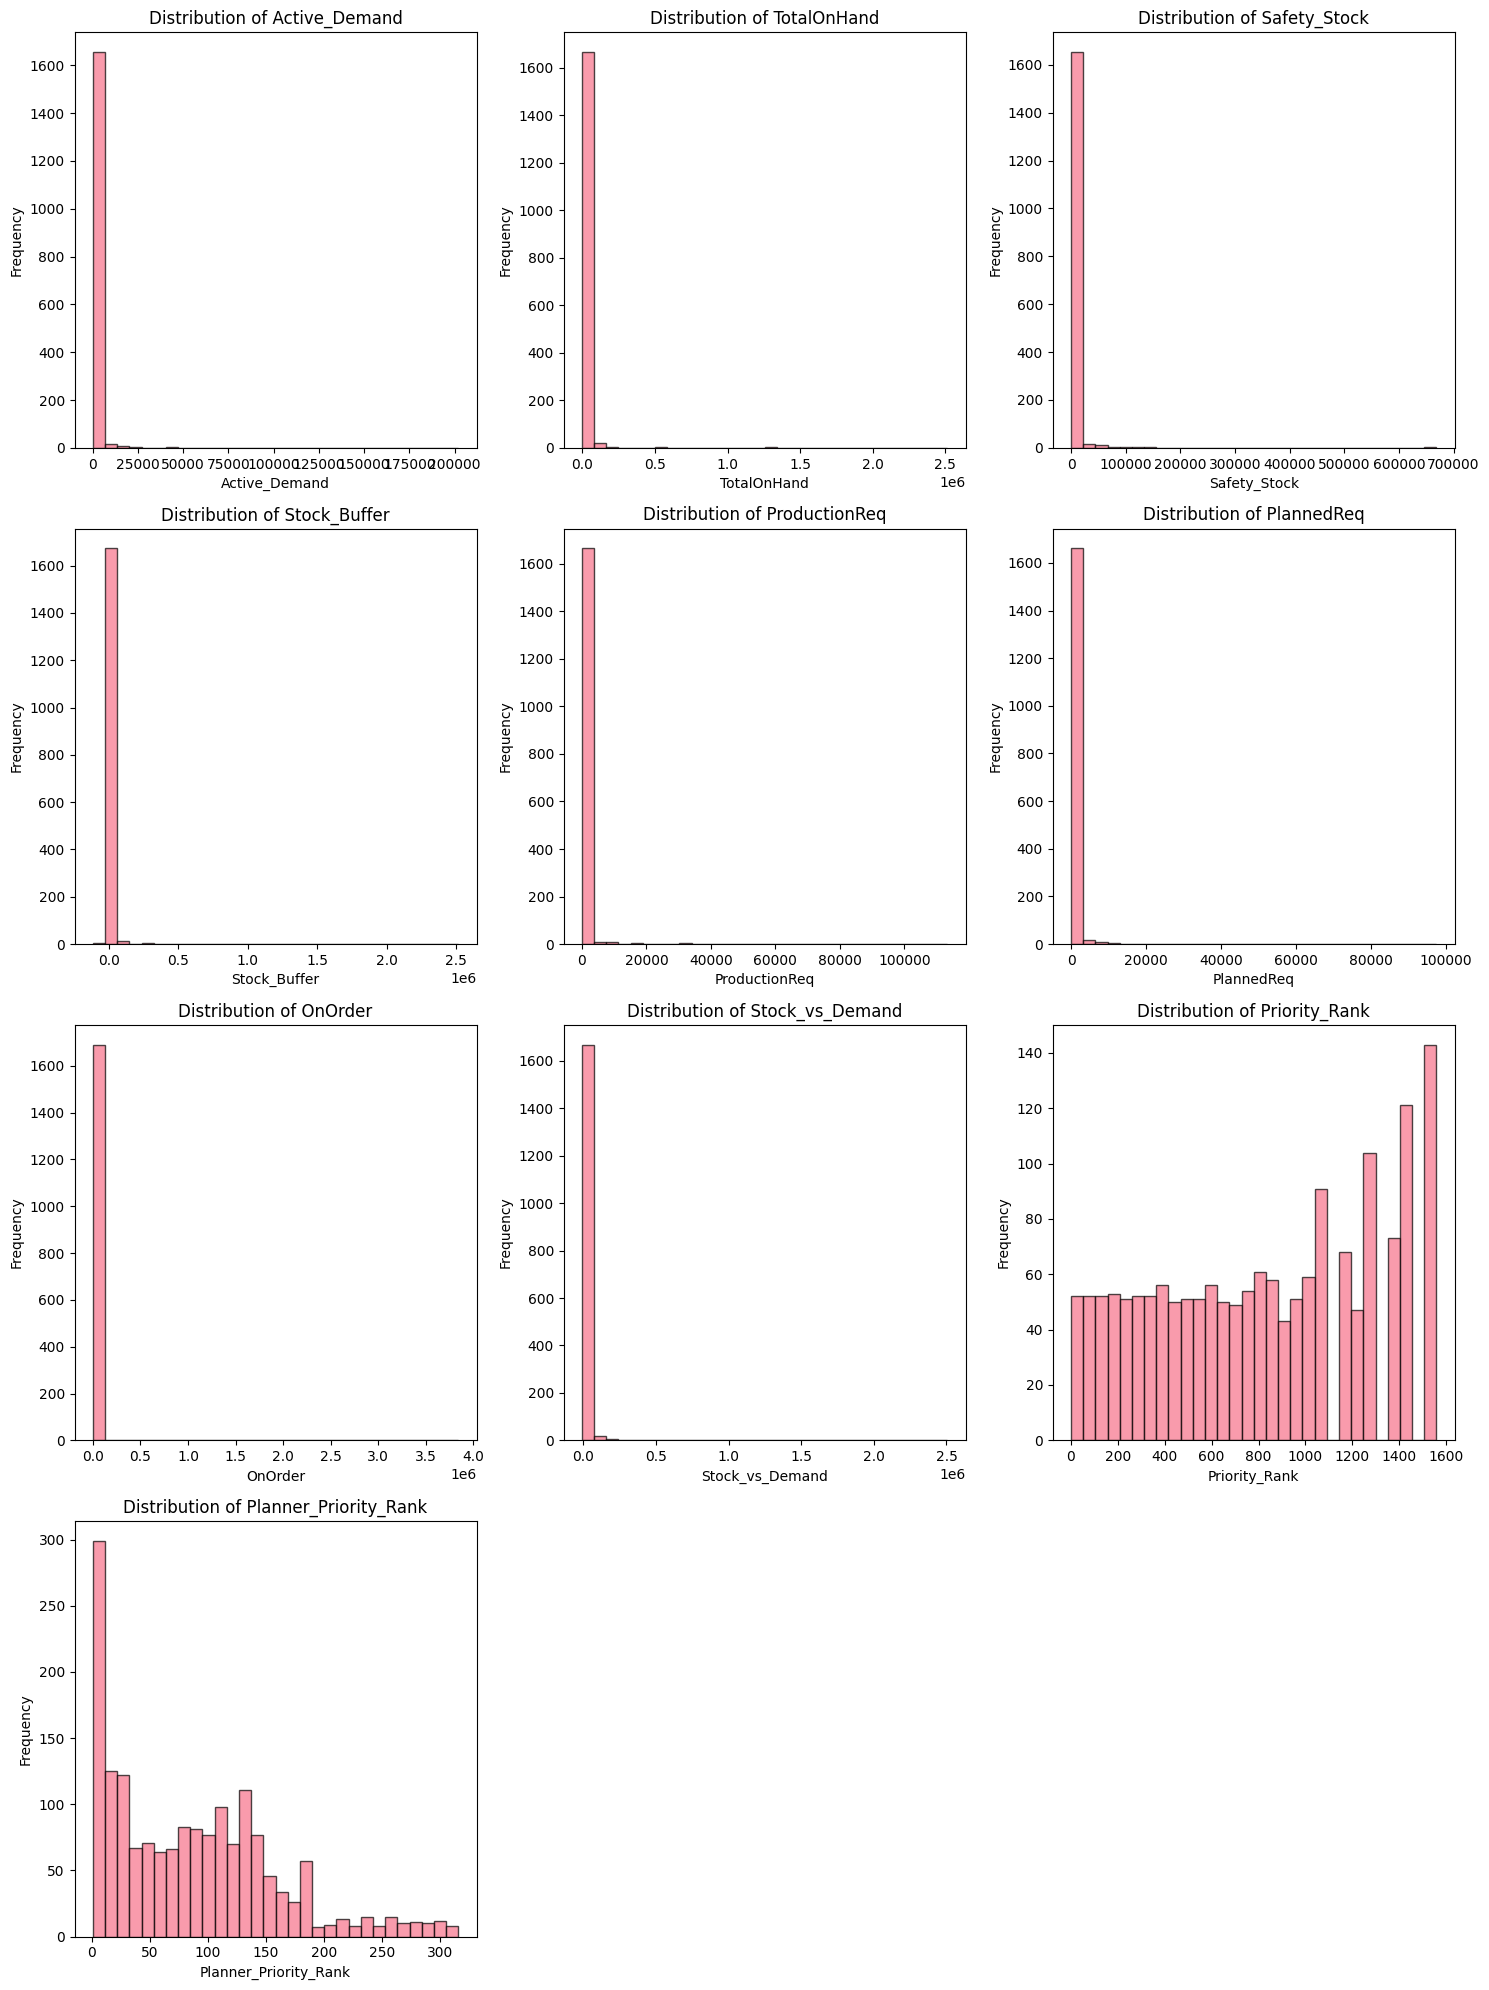

In [11]:
# Create distribution plots
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            data = df[col].dropna()
            axes[i].hist(data, bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

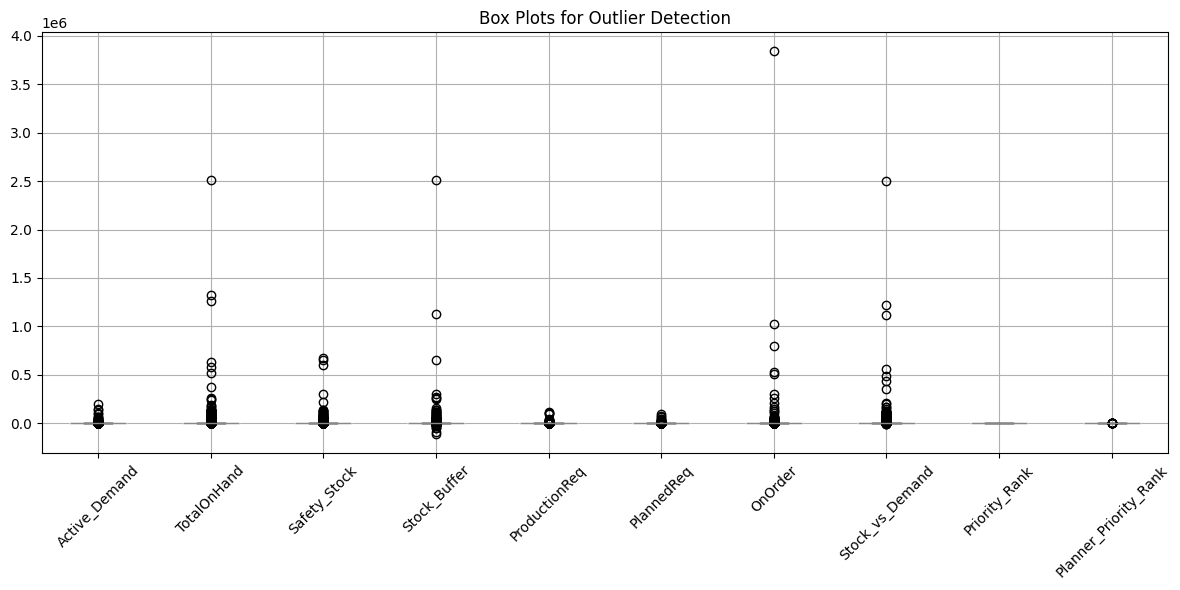

In [12]:
# Box plots for outlier visualization
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 6))
    df[numeric_cols].boxplot()
    plt.title('Box Plots for Outlier Detection')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
# Correlation analysis
if len(numeric_cols) > 1:
    print("=== CORRELATION ANALYSIS ===")
    
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()
    print("Correlation Matrix:")
    print(corr_matrix.round(3))
    
    # Find strong correlations
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    
    if strong_corr:
        print("\nStrong Correlations (|r| > 0.7):")
        for col1, col2, corr in strong_corr:
            print(f"  {col1} <-> {col2}: {corr:.3f}")
    else:
        print("\nNo strong correlations found (|r| > 0.7)")

=== CORRELATION ANALYSIS ===
Correlation Matrix:
                       Active_Demand  TotalOnHand  Safety_Stock  Stock_Buffer  \
Active_Demand                  1.000        0.514         0.720         0.285   
TotalOnHand                    0.514        1.000         0.521         0.931   
Safety_Stock                   0.720        0.521         1.000         0.174   
Stock_Buffer                   0.285        0.931         0.174         1.000   
ProductionReq                  0.936        0.482         0.659         0.274   
PlannedReq                     0.867        0.446         0.646         0.238   
OnOrder                        0.659        0.529         0.721         0.302   
Stock_vs_Demand                0.430        0.995         0.469         0.948   
Priority_Rank                 -0.213       -0.181        -0.204        -0.122   
Planner_Priority_Rank         -0.144       -0.129        -0.143        -0.088   

                       ProductionReq  PlannedReq  OnOrder  

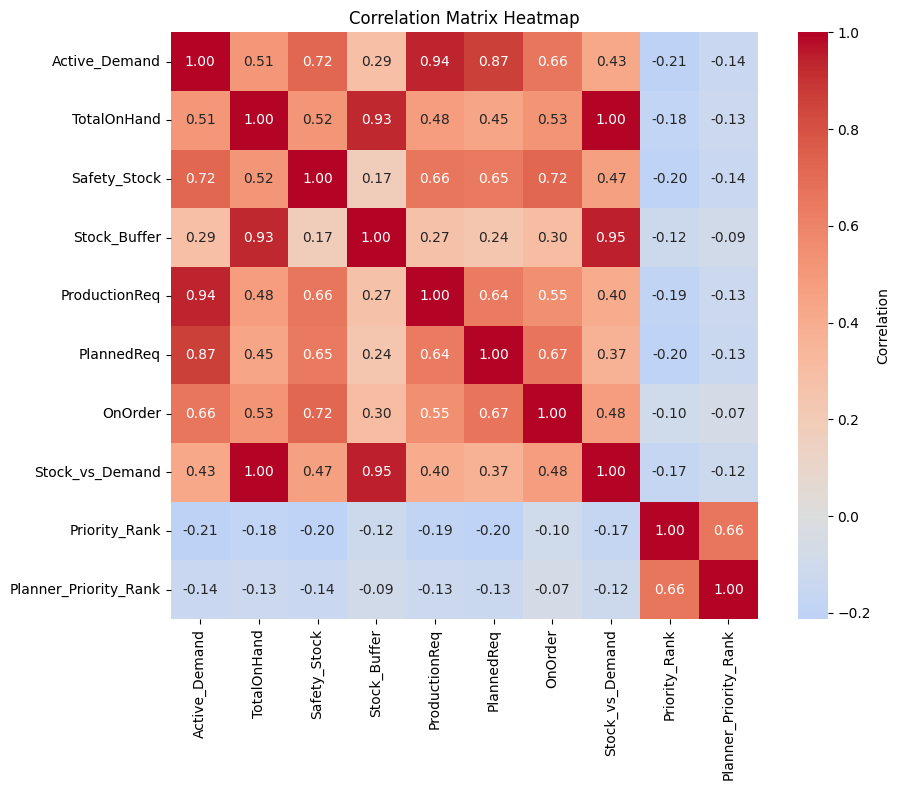

In [14]:
# Correlation heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
               square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()

In [15]:
# Look for and convert date columns
print("=== TIME SERIES ANALYSIS ===")

date_cols = []
for col in df.columns:
    if df[col].dtype == 'datetime64[ns]':
        date_cols.append(col)
    elif any(x in col.lower() for x in ['date', 'time', 'day']):
        try:
            df[col] = pd.to_datetime(df[col])
            date_cols.append(col)
            print(f"Converted {col} to datetime")
        except:
            print(f"Could not convert {col} to datetime")

print(f"Date columns found: {date_cols}")

=== TIME SERIES ANALYSIS ===
Could not convert DAYS_COVERAGE to datetime
Date columns found: []


In [16]:
# Time-based analysis (only run if date_cols is not empty)
if date_cols and len(numeric_cols) > 0:
    date_col = date_cols[0]  # Use first date column
    
    # Create time-based features
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['dayofweek'] = df[date_col].dt.dayofweek
    df['quarter'] = df[date_col].dt.quarter
    
    print("=== TEMPORAL PATTERNS ===")
    
    # Monthly trends
    print("\nMonthly Averages:")
    monthly_trends = df.groupby('month')[numeric_cols].mean()
    print(monthly_trends.round(2))
    
    # Day of week patterns
    print("\nDay of Week Patterns (0=Monday, 6=Sunday):")
    dow_patterns = df.groupby('dayofweek')[numeric_cols].mean()
    print(dow_patterns.round(2))
    
else:
    print("No date columns available for time series analysis")

No date columns available for time series analysis


In [17]:
# Time series plots
if date_cols and len(numeric_cols) > 0:
    date_col = date_cols[0]
    
    # Plot trends over time for each numeric variable
    n_cols = min(2, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            # Group by date and plot
            daily_data = df.groupby(df[date_col].dt.date)[col].mean()
            axes[i].plot(daily_data.index, daily_data.values)
            axes[i].set_title(f'{col} Over Time')
            axes[i].set_xlabel('Date')
            axes[i].set_ylabel(col)
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(len(numeric_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [18]:
# Prepare data for clustering
print("=== CLUSTERING ANALYSIS ===")

if len(numeric_cols) >= 2:
    # Prepare data for clustering (remove missing values)
    cluster_data = df[numeric_cols].dropna()
    print(f"Data for clustering: {cluster_data.shape[0]} rows, {cluster_data.shape[1]} columns")
    
    if len(cluster_data) > 10:  # Need sufficient data points
        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(cluster_data)
        
        print("Data standardized for clustering")
        print(f"Scaled data shape: {scaled_data.shape}")
    else:
        print("Insufficient data for clustering analysis")
        scaled_data = None
else:
    print("Need at least 2 numeric columns for clustering")
    scaled_data = None

=== CLUSTERING ANALYSIS ===
Data for clustering: 1700 rows, 10 columns
Data standardized for clustering
Scaled data shape: (1700, 10)


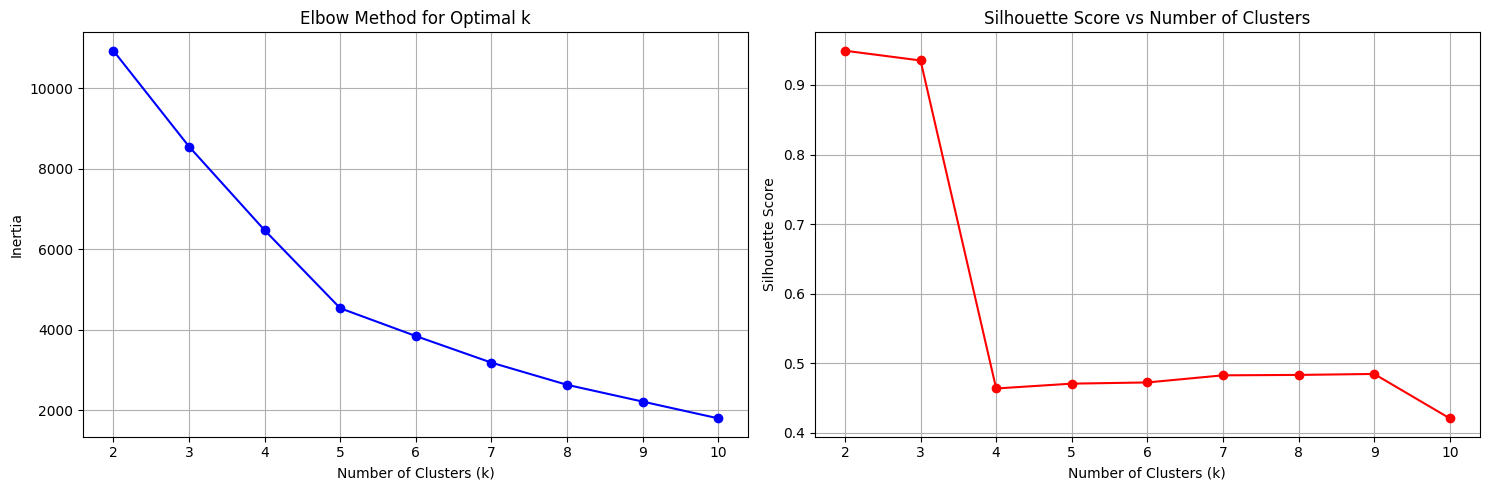

Optimal number of clusters based on silhouette score: 2


In [19]:
# Elbow method for optimal clusters
if scaled_data is not None:
    from sklearn.metrics import silhouette_score
    
    # Elbow method
    inertias = []
    silhouette_scores = []
    k_range = range(2, min(11, len(cluster_data)//3))
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(scaled_data)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_data, clusters))
    
    # Plot elbow curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.plot(k_range, inertias, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True)
    
    ax2.plot(k_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs Number of Clusters')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Find optimal k (highest silhouette score)
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

In [20]:
# Perform final clustering
if scaled_data is not None:
    # Use optimal k or default to 3
    final_k = optimal_k if 'optimal_k' in locals() else 3
    
    kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Add cluster labels to dataframe
    cluster_df = cluster_data.copy()
    cluster_df['Cluster'] = clusters
    
    print(f"=== CLUSTERING RESULTS (k={final_k}) ===")
    print("\nCluster sizes:")
    cluster_sizes = cluster_df['Cluster'].value_counts().sort_index()
    print(cluster_sizes)
    
    print("\nCluster characteristics (means):")
    cluster_summary = cluster_df.groupby('Cluster')[numeric_cols].mean()
    print(cluster_summary.round(2))
    
    # Store results for visualization
    clustering_results = {
        'data': cluster_df,
        'centers': kmeans.cluster_centers_,
        'scaler': scaler
    }

=== CLUSTERING RESULTS (k=2) ===

Cluster sizes:
Cluster
0    1695
1       5
Name: count, dtype: int64

Cluster characteristics (means):
         Active_Demand  TotalOnHand  Safety_Stock  Stock_Buffer  \
Cluster                                                           
0               828.31      5522.16       2605.17       2916.99   
1             92379.32   1262329.26     410681.60     851647.66   

         ProductionReq  PlannedReq     OnOrder  Stock_vs_Demand  \
Cluster                                                           
0               452.55      375.76     2182.50          4693.85   
1             58655.58    33723.75  1190748.85       1169949.94   

         Priority_Rank  Planner_Priority_Rank  
Cluster                                        
0               833.01                  86.73  
1                12.00                   1.20  


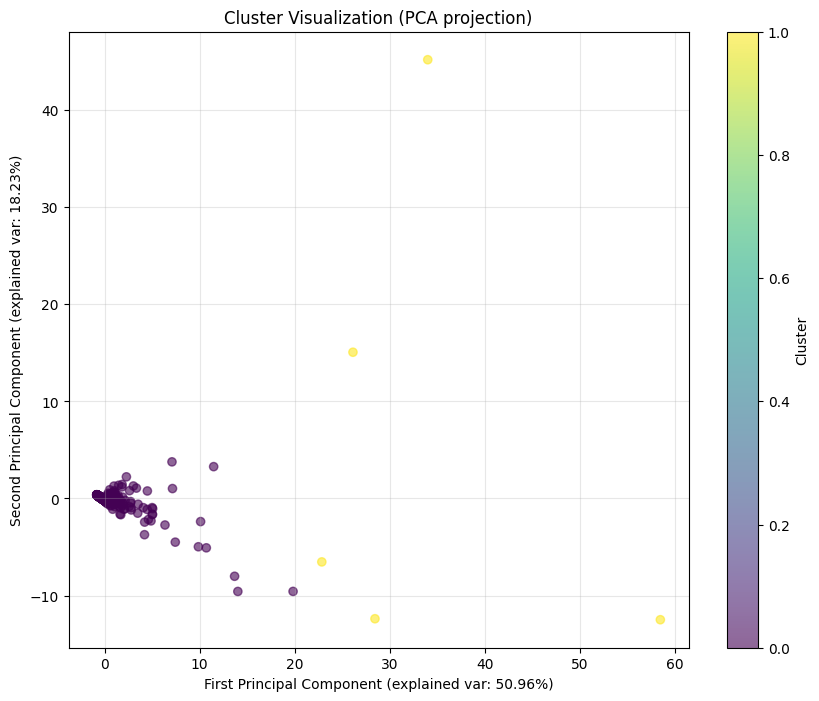

Total variance explained by first 2 components: 69.19%


In [21]:
# Visualize clusters
if scaled_data is not None and len(numeric_cols) >= 2:
    # If more than 2 dimensions, use PCA for visualization
    if len(numeric_cols) > 2:
        pca = PCA(n_components=2)
        pca_data = pca.fit_transform(scaled_data)
        
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.xlabel(f'First Principal Component (explained var: {pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'Second Principal Component (explained var: {pca.explained_variance_ratio_[1]:.2%})')
        plt.title('Cluster Visualization (PCA projection)')
        plt.colorbar(scatter, label='Cluster')
        plt.grid(True, alpha=0.3)
        plt.show()
        
        print(f"Total variance explained by first 2 components: {sum(pca.explained_variance_ratio_):.2%}")
    
    else:
        # Direct 2D plot
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
        plt.xlabel(numeric_cols[0])
        plt.ylabel(numeric_cols[1])
        plt.title('Cluster Visualization')
        plt.colorbar(scatter, label='Cluster')
        plt.grid(True, alpha=0.3)
        plt.show()

In [22]:
# Statistical tests
print("=== ADVANCED STATISTICAL ANALYSIS ===")

if len(numeric_cols) > 0:
    print("\n--- Normality Tests (Shapiro-Wilk) ---")
    for col in numeric_cols:
        data = df[col].dropna()
        if 3 < len(data) <= 5000:  # Shapiro-Wilk limitations
            stat, p_value = stats.shapiro(data)
            result = "Normal" if p_value > 0.05 else "Not Normal"
            print(f"{col}: W={stat:.4f}, p-value={p_value:.4f} ({result})")
        else:
            print(f"{col}: Sample size {len(data)} not suitable for Shapiro-Wilk test")

=== ADVANCED STATISTICAL ANALYSIS ===

--- Normality Tests (Shapiro-Wilk) ---
Active_Demand: W=0.0984, p-value=0.0000 (Not Normal)
TotalOnHand: W=0.0783, p-value=0.0000 (Not Normal)
Safety_Stock: W=0.0941, p-value=0.0000 (Not Normal)
Stock_Buffer: W=0.0547, p-value=0.0000 (Not Normal)
ProductionReq: W=0.0826, p-value=0.0000 (Not Normal)
PlannedReq: W=0.0892, p-value=0.0000 (Not Normal)
OnOrder: W=0.0290, p-value=0.0000 (Not Normal)
Stock_vs_Demand: W=0.0699, p-value=0.0000 (Not Normal)
Priority_Rank: W=0.9483, p-value=0.0000 (Not Normal)
Planner_Priority_Rank: W=0.9192, p-value=0.0000 (Not Normal)


In [23]:
# Simple regression analysis
if len(numeric_cols) >= 2:
    print("\n=== REGRESSION ANALYSIS ===")
    
    # Try different combinations of variables
    for i, y_col in enumerate(numeric_cols[:3]):  # Limit to first 3 as dependent variables
        print(f"\n--- {y_col} as Dependent Variable ---")
        
        for x_col in numeric_cols:
            if x_col != y_col:
                # Prepare data
                valid_data = df[[y_col, x_col]].dropna()
                
                if len(valid_data) > 10:
                    X = valid_data[x_col]
                    y = valid_data[y_col]
                    X_with_const = sm.add_constant(X)  # Add intercept
                    
                    try:
                        model = sm.OLS(y, X_with_const).fit()
                        print(f"  {y_col} ~ {x_col}:")
                        print(f"    R²: {model.rsquared:.3f}")
                        print(f"    Adj R²: {model.rsquared_adj:.3f}")
                        print(f"    F p-value: {model.f_pvalue:.4f}")
                        print(f"    Coefficient: {model.params[x_col]:.4f}")
                        print(f"    Coeff p-value: {model.pvalues[x_col]:.4f}")
                    except:
                        print(f"  Could not fit model for {y_col} ~ {x_col}")


=== REGRESSION ANALYSIS ===

--- Active_Demand as Dependent Variable ---
  Active_Demand ~ TotalOnHand:
    R²: 0.264
    Adj R²: 0.264
    F p-value: 0.0000
    Coefficient: 0.0545
    Coeff p-value: 0.0000
  Active_Demand ~ Safety_Stock:
    R²: 0.519
    Adj R²: 0.519
    F p-value: 0.0000
    Coefficient: 0.2057
    Coeff p-value: 0.0000
  Active_Demand ~ Stock_Buffer:
    R²: 0.081
    Adj R²: 0.081
    F p-value: 0.0000
    Coefficient: 0.0349
    Coeff p-value: 0.0000
  Active_Demand ~ ProductionReq:
    R²: 0.876
    Adj R²: 0.876
    F p-value: 0.0000
    Coefficient: 1.4506
    Coeff p-value: 0.0000
  Active_Demand ~ PlannedReq:
    R²: 0.752
    Adj R²: 0.752
    F p-value: 0.0000
    Coefficient: 1.8980
    Coeff p-value: 0.0000
  Active_Demand ~ OnOrder:
    R²: 0.434
    Adj R²: 0.434
    F p-value: 0.0000
    Coefficient: 0.0568
    Coeff p-value: 0.0000
  Active_Demand ~ Stock_vs_Demand:
    R²: 0.185
    Adj R²: 0.184
    F p-value: 0.0000
    Coefficient: 0.0479
    

In [24]:
# Generate summary insights
print("="*80)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*80)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total records: {df.shape[0]:,}")
print(f"   • Total variables: {df.shape[1]}")
print(f"   • Numeric variables: {len(numeric_cols)}")
print(f"   • Date variables: {len(date_cols) if 'date_cols' in locals() else 0}")

# Data completeness
missing_pct = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"   • Data completeness: {100-missing_pct:.1f}%")

if len(numeric_cols) > 0:
    print(f"\n📈 KEY METRICS:")
    
    # Coefficient of variation analysis
    cv_analysis = []
    for col in numeric_cols:
        data = df[col].dropna()
        if data.mean() != 0:
            cv = data.std() / abs(data.mean())
            cv_analysis.append((col, cv))
    
    if cv_analysis:
        cv_analysis.sort(key=lambda x: x[1], reverse=True)
        print(f"   • Most variable: {cv_analysis[0][0]} (CV: {cv_analysis[0][1]:.2f})")
        print(f"   • Most stable: {cv_analysis[-1][0]} (CV: {cv_analysis[-1][1]:.2f})")

if 'strong_corr' in locals() and strong_corr:
    print(f"\n🔗 CORRELATIONS:")
    print(f"   • Found {len(strong_corr)} strong correlation(s)")
    for col1, col2, corr in strong_corr[:3]:  # Show top 3
        print(f"   • {col1} ↔ {col2}: {corr:.3f}")

if 'clustering_results' in locals():
    print(f"\n🎯 CLUSTERING:")
    print(f"   • Optimal clusters: {final_k}")
    print(f"   • Cluster sizes: {dict(cluster_sizes)}")

print(f"\n💡 NEXT STEPS:")
print(f"   • Investigate outliers and anomalies")
print(f"   • Consider predictive modeling opportunities")
print(f"   • Develop automated monitoring for key metrics")
if date_cols:
    print(f"   • Implement time series forecasting")
print(f"   • Create interactive dashboards for stakeholders")

COMPREHENSIVE ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
   • Total records: 1,700
   • Total variables: 21
   • Numeric variables: 10
   • Date variables: 0
   • Data completeness: 100.0%

📈 KEY METRICS:
   • Most variable: OnOrder (CV: 17.74)
   • Most stable: Priority_Rank (CV: 0.56)

🔗 CORRELATIONS:
   • Found 7 strong correlation(s)
   • Active_Demand ↔ Safety_Stock: 0.720
   • Active_Demand ↔ ProductionReq: 0.936
   • Active_Demand ↔ PlannedReq: 0.867

🎯 CLUSTERING:
   • Optimal clusters: 2
   • Cluster sizes: {0: np.int64(1695), 1: np.int64(5)}

💡 NEXT STEPS:
   • Investigate outliers and anomalies
   • Consider predictive modeling opportunities
   • Develop automated monitoring for key metrics
   • Create interactive dashboards for stakeholders


In [25]:
# Export key results
print("=== EXPORTING RESULTS ===")

# Create a summary dataframe
summary_stats = df[numeric_cols].describe().T
summary_stats['CV'] = summary_stats['std'] / abs(summary_stats['mean'])
summary_stats['Missing_Count'] = df[numeric_cols].isnull().sum()
summary_stats['Missing_Pct'] = (summary_stats['Missing_Count'] / len(df)) * 100

print("Summary statistics:")
print(summary_stats.round(3))

# Save to Excel if needed
# summary_stats.to_excel('inventory_analysis_summary.xlsx')
# print("Summary exported to 'inventory_analysis_summary.xlsx'")

# Save correlation matrix if it exists
if 'corr_matrix' in locals():
    # corr_matrix.to_excel('correlation_matrix.xlsx')
    print("Correlation matrix ready for export")

# Save clustering results if available
if 'clustering_results' in locals():
    # clustering_results['data'].to_excel('clustering_results.xlsx', index=False)
    print("Clustering results ready for export")

=== EXPORTING RESULTS ===
Summary statistics:
                        count      mean         std        min    25%    50%  \
Active_Demand          1700.0  1097.581    8676.709       1.00    4.0   19.0   
TotalOnHand            1700.0  9218.652   81927.248   -3020.03   35.0  135.0   
Safety_Stock           1700.0  3805.391   30382.537       0.00   18.0   63.0   
Stock_Buffer           1700.0  5413.261   70989.780 -114652.56    4.0   36.0   
ProductionReq          1700.0   623.738    5597.223       0.00    0.0    3.0   
PlannedReq             1700.0   473.843    3965.002      -1.00    2.0   10.0   
OnOrder                1700.0  5678.286  100715.953       0.00    0.0    0.0   
Stock_vs_Demand        1700.0  8121.071   77821.727   -9004.00   24.0  104.0   
Priority_Rank          1700.0   830.598     469.125       1.00  424.0  843.0   
Planner_Priority_Rank  1700.0    86.478      72.239       1.00   22.0   80.0   

                           75%         max      CV  Missing_Count  Missin